In [17]:
import tensorflow as tf

In [18]:
mnist=tf.keras.datasets.mnist 

In [19]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [20]:
x_train.shape

(60000, 28, 28)

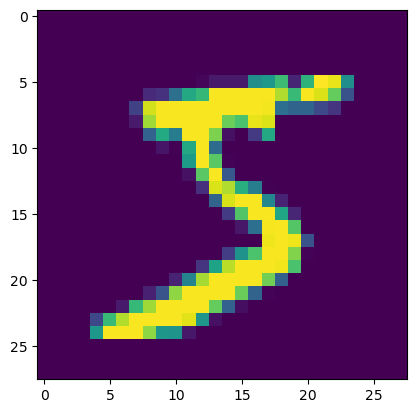

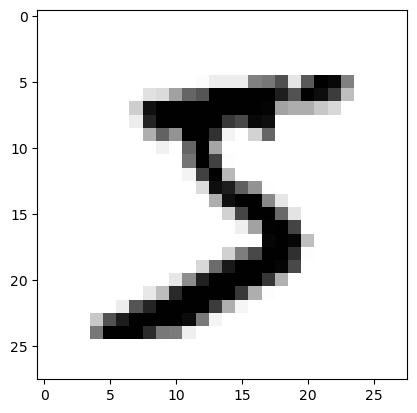

In [21]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [22]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

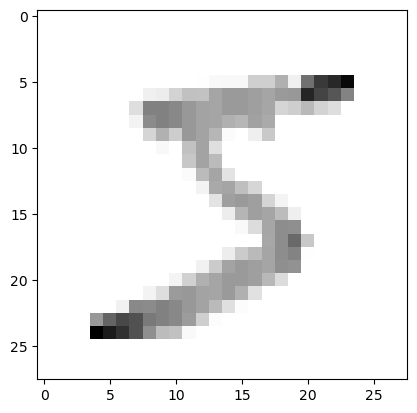

In [23]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)


In [24]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("training dimensions",x_trainr.shape)
print("testing dimensions",x_trainr.shape)


training dimensions (60000, 28, 28, 1)
testing dimensions (60000, 28, 28, 1)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [26]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [28]:
print("Total Training Sample=",len(x_trainr))

Total Training Sample= 60000


In [29]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam", metrics=['accuracy'])


In [30]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5

1313/1313 [==============================] - 22s 16ms/step - loss: 0.3197 - accuracy: 0.9000 - val_loss: 0.1511 - val_accuracy: 0.9537
Epoch 2/5
1313/1313 [==============================] - 21s 16ms/step - loss: 0.1067 - accuracy: 0.9676 - val_loss: 0.1080 - val_accuracy: 0.9672
Epoch 3/5
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0759 - accuracy: 0.9773 - val_loss: 0.0762 - val_accuracy: 0.9770
Epoch 4/5
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0606 - accuracy: 0.9812 - val_loss: 0.0830 - val_accuracy: 0.9753
Epoch 5/5
1313/1313 [==============================] - 19s 15ms/step - loss: 0.0486 - accuracy: 0.9845 - val_loss: 0.0720 - val_accuracy: 0.9788


In [31]:
test_loss,test_acc=model.evaluate(x_testr,y_test)
print("Test loss on 10000 test samples", test_loss)
print("Validation Accuracy on 10000 test samples", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0691 - accuracy: 0.9811
Test loss on 10000 test samples 0.06910103559494019
Validation Accuracy on 10000 test samples 0.9811000227928162


In [32]:
predictions=model.predict([x_testr])

313/313 [==============================] - 2s 5ms/step


In [33]:
model.save('model.h5')


C:\Users\ankit\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
print(predictions)

[[1.6424829e-07 1.5470865e-05 8.0076697e-06 ... 9.9996996e-01
  8.8331040e-09 2.9031662e-06]
 [2.3134578e-05 7.2664943e-06 9.9995673e-01 ... 8.7276712e-06
  1.7843938e-07 9.7988084e-07]
 [4.2328782e-07 9.9992692e-01 6.3458820e-06 ... 4.1842064e-05
  4.9837553e-07 2.3976429e-06]
 ...
 [1.0253080e-08 8.8171426e-08 6.3453670e-10 ... 2.5175198e-06
  2.9797073e-07 1.5665032e-06]
 [2.4445561e-07 1.8247449e-11 8.4919192e-13 ... 2.2160176e-10
  6.9573396e-09 6.1343087e-08]
 [1.2859161e-03 8.4340027e-06 1.0205129e-04 ... 1.4495460e-05
  5.8786954e-05 3.4942201e-05]]


In [35]:
print(np.argmax(predictions[0]))

7


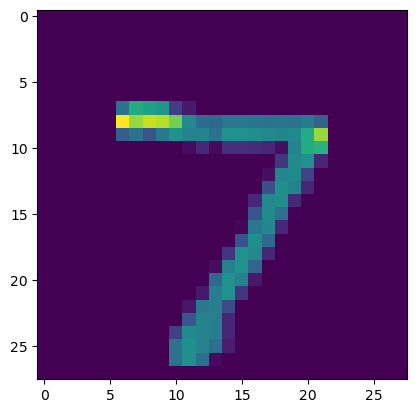

In [36]:
plt.imshow(x_test[0])

In [37]:
print(np.argmax(predictions[128]))

8


In [38]:
import cv2

In [ ]:
img=cv2.imread()

TypeError: imread() missing required argument 'filename' (pos 1)

In [16]:
img.shape

NameError: name 'img' is not defined

In [ ]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
resized=cv2.resize(gray,(28,28), interpolation=cv2.INTER_AREA)

In [ ]:
newimg=tf.keras.util.normalize(resized, axis=1)
newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)


In [ ]:
predictions=model.predict(newimg)

In [ ]:
print(np.argmax(predictions))

In [40]:
from tensorflow.keras.models import load_model


In [41]:
loaded_model = load_model('model.h5')

In [ ]:
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN

cap=cv2.VideoCapture()
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("camera not detected")

text="String"
(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]
text_offset_x=10
text_offset_y=25
box_coords=((text_offset_x,text_offset_y),(text_offset_x+text_width+2,text_offset_y-text_height-2))
center=0
while True:
    ret,frame=cap.read()
    center+=1
    if center%2==0:
        gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
        newimg=tf.keras.utils.normalize(resized,axis=1)
        newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)
        predictions=model.predict(newimg)
        sts=np.argmax(predictions)

        print(sts)
        print(type(sts))

        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,255,0),-1)
        cv2.putText(frame,sts.astype(str),(x1+int(w1/5),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.imshow("handwritten digits", frame)

        if cv2.waitKey(2) & 0xFF==ord('q'):
            break
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 91ms/step
0
<class 'numpy.int64'>
1/1 [==============================] - 0s 29ms/step
0
<class 'numpy.int64'>
1/1 [==============================] - 0s 26ms/step
0
<class 'numpy.int64'>
1/1 [==============================] - 0s 26ms/step
0
<class 'numpy.int64'>
1/1 [==============================] - 0s 25ms/step
0
<class 'numpy.int64'>
1/1 [==============================] - 0s 24ms/step
0
<class 'numpy.int64'>
1/1 [==============================] - 0s 25ms/step
0
<class 'numpy.int64'>
1/1 [==============================] - 0s 23ms/step
0
<class 'numpy.int64'>
1/1 [==============================] - 0s 30ms/step
0
<class 'numpy.int64'>
1/1 [==============================] - 0s 26ms/step
0
<class 'numpy.int64'>
1/1 [==============================] - 0s 26ms/step
0
<class 'numpy.int64'>
1/1 [==============================] - 0s 27ms/step
0
<class 'numpy.int64'>
1/1 [==============================] - 0s 24ms/step
0
<class 'numpy.int64'>
1/1 [=======

KeyboardInterrupt: 

: 

In [ ]:
# import numpy as np
# import cv2

# Initialize a black image
height, width = 600, 800
image = np.zeros((height, width, 3), np.uint8)

# Variables to track drawing state and initial position
drawing = False
ix, iy = -1, -1

# Drawing color (B, G, R) set to white, and the "eraser" color set to black (background color)
draw_color = (255, 255, 255)
erase_color = (0, 0, 0)
current_color = draw_color

# Thickness
thickness = 2

# Mouse callback function
def draw_erase(event, x, y, flags, param):
    global ix, iy, drawing, current_color, thickness

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.line(image, (ix, iy), (x, y), current_color, thickness)
            ix, iy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.line(image, (ix, iy), (x, y), current_color, thickness)

    # Right-click to toggle between draw and erase
    elif event == cv2.EVENT_RBUTTONDOWN:
        if current_color == draw_color:
            current_color = erase_color
            thickness = 20  # Typically, you might want a larger eraser
        else:
            current_color = draw_color
            thickness = 2  # Reset to default drawing thickness

# Create a window and bind the function to the window
cv2.namedWindow('Drawing Pad')
cv2.setMouseCallback('Drawing Pad', draw_erase)
text="String"
(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]
text_offset_x=10
text_offset_y=25
box_coords=((text_offset_x,text_offset_y),(text_offset_x+text_width+2,text_offset_y-text_height-2))
center=0
while True:
    cv2.imshow('Drawing Pad', image)
    if center%2==0:
        gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
        newimg=tf.keras.utils.normalize(resized,axis=1)
        newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)
        predictions=model.predict(newimg)
        sts=np.argmax(predictions)

        print(sts)
        print(type(sts))
    
    # Break the loop when 'ESC' is pressed
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()


NameError: name 'font' is not defined

: 

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load your pretrained model
model = load_model('model.h5')

# Initialize a black image
height, width = 600, 800
image = np.zeros((height, width, 3), np.uint8)

# Previous setup code here...
drawing = False
ix, iy = -1, -1

# Drawing color (B, G, R) set to white, and the "eraser" color set to black (background color)
draw_color = (255, 255, 255)
erase_color = (0, 0, 0)
current_color = draw_color

# Thickness
thickness = 2

# Mouse callback function
def draw_erase(event, x, y, flags, param):
    global ix, iy, drawing, current_color, thickness

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.line(image, (ix, iy), (x, y), current_color, thickness)
            ix, iy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.line(image, (ix, iy), (x, y), current_color, thickness)

    # Right-click to toggle between draw and erase
    elif event == cv2.EVENT_RBUTTONDOWN:
        if current_color == draw_color:
            current_color = erase_color
            thickness = 20  # Typically, you might want a larger eraser
        else:
            current_color = draw_color
            thickness = 2  # Reset to default drawing thickness

def predict_digit(img):
    # Preprocess the image for your model
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray, (28, 28))  # Assuming the model expects 28x28 input
    img_gray = img_gray.reshape(1, 28, 28, 1)  # Reshape for model (if needed)
    img_gray = img_gray / 255.0  # Normalize
    
    # Make a prediction
    prediction = model.predict(img_gray)
    digit = np.argmax(prediction)
    probability = np.max(prediction)
    return digit, probability

# Create a window and bind the function to the window
cv2.namedWindow('Drawing Pad')
cv2.setMouseCallback('Drawing Pad', draw_erase)

while True:
    cv2.imshow('Drawing Pad', image)
    
    # If 'p' is pressed, predict the digit
    if cv2.waitKey(1) & 0xFF == ord('p'):
        digit,probability=predict_digit(image)
        print(f"Predicted Digit: {digit}, Probability: {probability:.2f}")
    
    # Break the loop when 'ESC' is pressed
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()


NameError: name 'draw_erase' is not defined

: 